In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3
import pandas as pd
from lsst.sims.featureScheduler.utils import standard_goals
import healpy as hp
from lsst.sims.utils import hpid2RaDec
from scipy.stats import binned_statistic

In [2]:
filename = '../debugging_rolling/testrolling__mod2_sdf_0.20_noddf_v1.4_10yrs.db'
#filename = '../baseline/baseline_v1.4_10yrs.db'
conn = sqlite3.connect(filename)
df = pd.read_sql('select observationStartLST from SummaryAllProps;', conn)

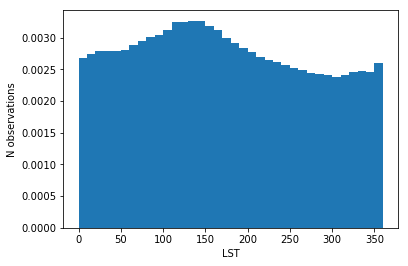

In [3]:
bins = np.arange(0,361, 10)
ack = plt.hist(df['observationStartLST'], bins=bins, normed=True)
plt.xlabel('LST')
plt.ylabel('N observations')

In [4]:
nside = 32
sg = standard_goals(nside=nside)
total_requested = sg['r']*0
for key in sg:
    total_requested += sg[key]

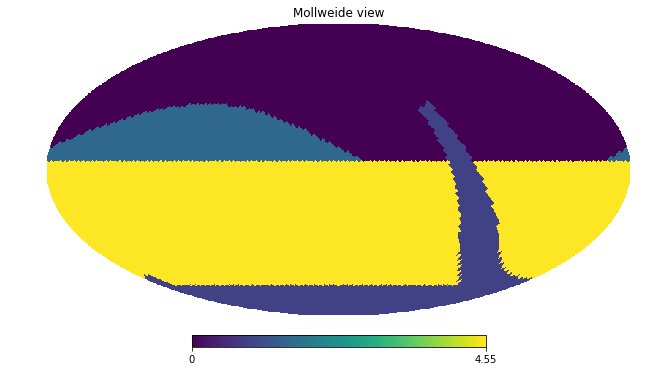

In [5]:
hp.mollview(total_requested)

In [6]:
ra,dec = hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))

In [7]:
binned_requested, be, bn = binned_statistic(ra, total_requested, statistic=np.sum, bins=bins)

br = binned_requested/(np.sum(binned_requested)*(be[1]-be[0]))

<Container object of 36 artists>

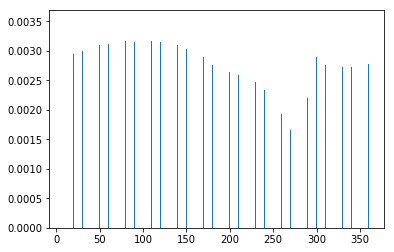

In [8]:
plt.bar(be[1:], br)

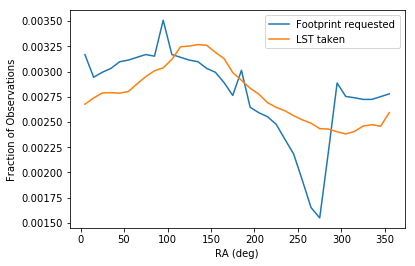

In [9]:
bc = (be[0:-1]+be[1:])/2.
plt.plot(bc, br, label='Footprint requested')
plt.plot(bc, ack[0], label='LST taken')
plt.xlabel('RA (deg)')
plt.ylabel('Fraction of Observations')
plt.legend()

# Blue line above means we are over-subscribed
# Blue line below means we are under-subscribed

# Spikes in blue result of HEALpix distribution in RA not being random

# Note that adding DDFs makes this worse if they are in the popular extra-galactic area